In [ ]:
#EX NO: 06        EX NO 6 - Performance Analysis on Regression Techniques     BHARATH KUMAR 
#Date:19-02-2024                                                              URK22AI1030 

Aim

To implement the linear regression model for the given dataset and to demonstrate the
performance analysis on regression techniques

Description

Linear Regression
    Regression searches for relationships among variables. Regression is used to build a prediction
model to predict the response (y) from the input variables (x) where the prediction is based on the
previous data.
    Linear regression model defines a linear relationship between the output variable (y) and a
combination of one or more input variables (x)

Simple linear regression
    This model has single independent and single dependent variable.
Eg: the experience impact salaries
B 0  = the y-intercept
B 1 = the regression coefficient (slope)


Performance Metrics for Regression Problems
    Various performance metrics that can be used to evaluate predictions for regression
problems are mean absolute error, mean squared error and R squared value.
Mean Absolute Error (MAE)
    It is the simplest error metric used in regression problems. It is basically the sum of
average of the absolute difference between the predicted and actual values.

Mean Square Error (MSE)
    MSE is like the MAE, but the only difference is that the it squares the difference of
actual and predicted output values before summing them all instead of using the absolute
value.

mean_squared_error function of sklearn.metrics to compute MSE.

R Squared (R 2 )
    R Squared metric is generally used for explanatory purpose and provides
an indication of the goodness or fit of a set of predicted output values to the
actual output values.

numerator is MSE
denominator is the variance in � values.
R 2 _score function of sklearn.metrics to compute R squared value

In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
df = {
    'Subject':[1, 2, 3, 4, 5, 6],
    'AGE X': [43, 21, 25, 42, 57, 59],
    'GLUCOSE LEVEL': [99, 65, 79, 75, 87, 81]
}

# Create the DataFrame
data = pd.DataFrame(df)


In [26]:
corr = data.corr()
print(corr)

                Subject     AGE X  GLUCOSE LEVEL
Subject        1.000000  0.695582      -0.130664
AGE X          0.695582  1.000000       0.529809
GLUCOSE LEVEL -0.130664  0.529809       1.000000


In [27]:
data.isnull().sum()

Subject          0
AGE X            0
GLUCOSE LEVEL    0
dtype: int64

In [28]:
X = np.array(data[['AGE X']])
Y = data[['GLUCOSE LEVEL']]

In [29]:
model = LinearRegression(fit_intercept = True)

In [30]:
model.fit(X,Y)


LinearRegression()

In [31]:
print("Intercept: " , model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  [65.14157152]
Coefficient:  [[0.38522498]]


In [32]:
y_pred = model.predict(X)

In [35]:
mse = mean_squared_error(Y, y_pred)
mae = mean_absolute_error(Y, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(Y, y_pred)

In [37]:
print("Intercept (b0):", model.intercept_)
print("Regression coefficient (b1):", model.coef_[0])
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-Squared:", r_squared)

Intercept (b0): [65.14157152]
Regression coefficient (b1): [0.38522498]
Mean Squared Error: 78.64374300425344
Mean Absolute Error: 7.173852697559885
Root Mean Squared Error: 8.86813075029081
R-Squared: 0.2806974725220722


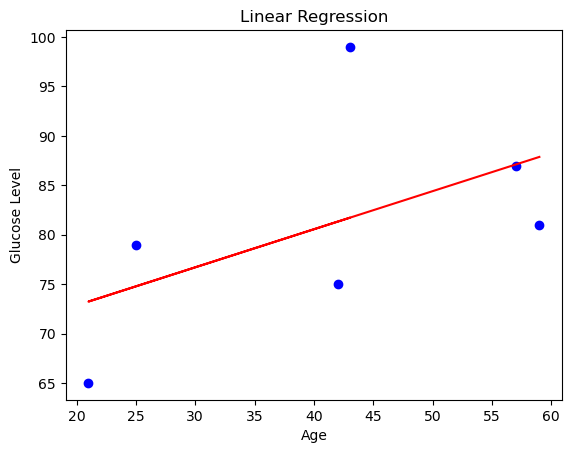

In [40]:
plt.scatter(X, Y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np 
df=pd.read_csv("heart.csv")
df


,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224
...,...,...,...,...
493,494,47.660440,27.562464,11.294392
494,495,45.097203,21.385620,9.616762
495,496,8.279743,6.423720,13.495168
496,497,42.345863,20.741328,10.115865


In [42]:
corr = df.corr()
print(corr)

               Unnamed: 0    biking   smoking  heart.disease
Unnamed: 0       1.000000  0.057088  0.052674      -0.051725
biking           0.057088  1.000000  0.015136      -0.935455
smoking          0.052674  0.015136  1.000000       0.309131
heart.disease   -0.051725 -0.935455  0.309131       1.000000


In [43]:
df.dropna(inplace=True)

In [44]:
x= np.array(df[['smoking']])
y = df[['heart.disease']]

In [45]:
model = LinearRegression(fit_intercept = True)

In [46]:
model.fit(x,y)
print('Intercept: \n',model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 [7.5431069]
Coefficients: 
 [[0.17048431]]


In [47]:
ypred = model.predict(x)
error = (y-ypred)**2
print("Error",error.sum()/400)
print(x.shape)

Error heart.disease    23.48896
dtype: float64
(498, 1)


In [48]:
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(ypred,y))
print("R^2:",metrics.r2_score(ypred,y))

MSE: 18.8666343920003
R^2: -8.464414675286777


Text(0, 0.5, 'y')

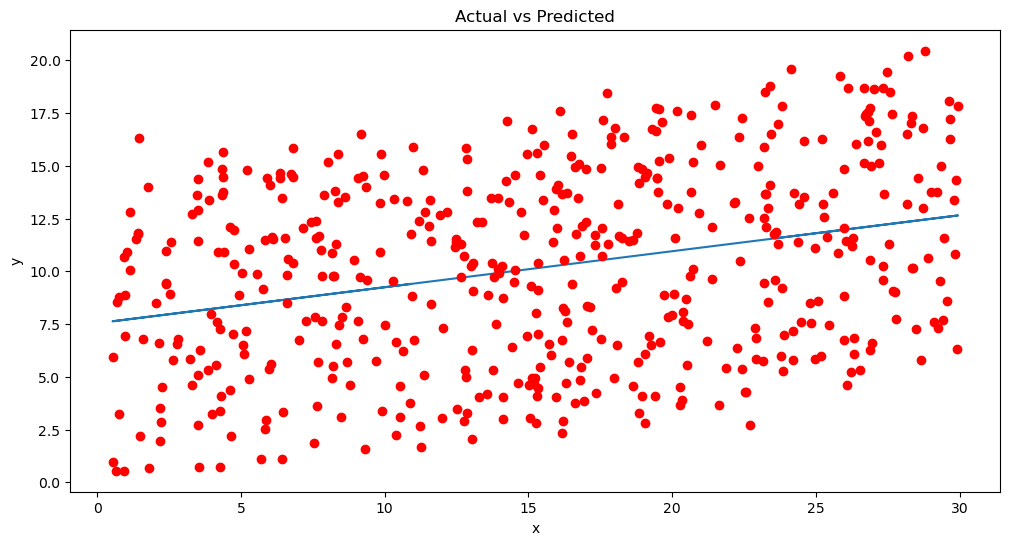

In [49]:
plt.figure(figsize=(12,6))
plt.plot(x,ypred)
plt.plot(x,y,'ro')
plt.title('Actual vs Predicted')
plt.xlabel('x')
plt.xlabel('x')
plt.ylabel('y')
